# Machine Learning Model Building for SmallDS

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Model Building for SmallDS

In [25]:
import os
file_path = 'Car_Prediction_Splitdata/small/scaled_small_car_used_data_ftloc_with_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [26]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [27]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [28]:
df= pd.read_csv('Car_Prediction_Splitdata/small/scaled_small_car_used_data_ftloc_without_outliers.csv')
df.head()

,maker_model,variants,body_type,type,seat,door,mileage,non_smoker_vehicle,power,gearbox,engine_size,fuel_type,emission_classe,colour,manufacturer_colour,upholstery_colour,upholstery,car_age,inspection_interval,price (€)
0,1.169517,-1.080698,-1.735770,0.433322,-0.956197,-2.670224,0.105417,0.565606,-0.100320,-0.642786,0.237282,-0.034226,-0.885802,0.156766,-0.857715,-0.368349,-0.059472,0.379073,-0.946833,24899
1,-0.349758,1.013820,-0.471444,-0.511816,0.168741,0.758355,-1.071779,0.565606,-0.311052,-0.642786,-0.701332,1.227865,0.556912,0.156766,1.671381,-0.368349,1.402546,-1.528416,-0.946833,27990
2,1.270243,-1.427755,0.792883,-2.402093,0.168741,0.758355,-0.894959,0.565606,-0.451539,1.555728,-0.671416,0.596820,0.556912,0.156766,0.342344,-0.368349,-0.790481,-1.146918,0.496659,34980
3,-0.668721,0.867691,0.792883,0.433322,0.168741,-0.384505,1.417652,-1.768014,-0.451539,1.555728,-0.488180,0.596820,-1.607159,-1.131425,0.684417,-0.368349,-0.790481,2.095813,0.496659,8890
4,0.590346,-1.287714,0.792883,0.433322,0.168741,0.758355,-0.603373,0.565606,-0.188125,-0.642786,0.184929,-0.875621,1.278269,0.156766,0.925550,-0.368349,0.671537,-0.002425,0.496659,20780


In [29]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (826, 19)
Training target vector size: (826,)
Test feature matrix size: (354, 19)
Test target vector size: (354,)


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 80.85121737212427
mean_squared_error: 50952794.376510724
mean_absolute_error: 4710.580677966102
root_mean_squared_error: 7138.1226086773495

Cross validation score : 83.51041205092736

R2_Score - Cross Validation Score : -2.6591946788030896


##### Đồ thị so khớp của mô hình

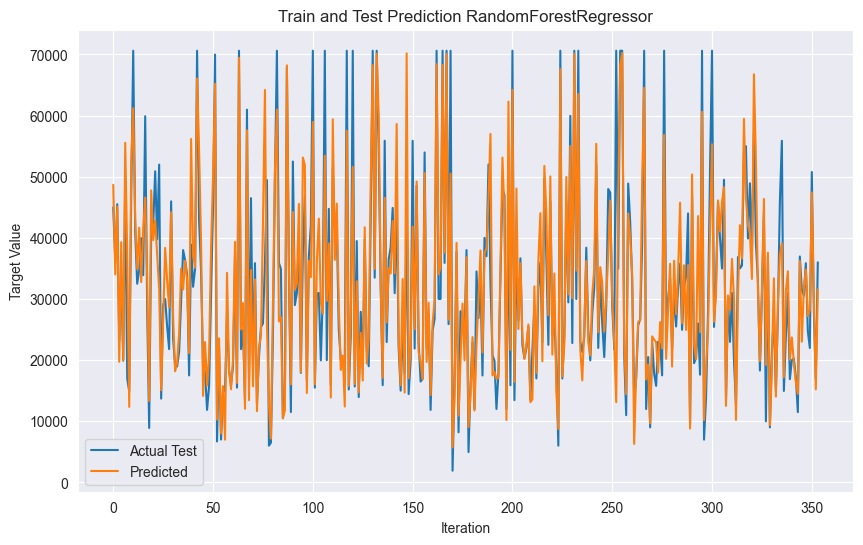

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor small.png')
plt.show()

### XGBRegressor

In [35]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 82.21845858463308
mean_squared_error: 47314716.60844216
mean_absolute_error: 4484.041747357212
root_mean_squared_error: 6878.569372219936

Cross validation score : 85.04104895773978

R2_Score - Cross Validation Score : -2.822590373106692


##### Đồ thị so khớp của mô hình

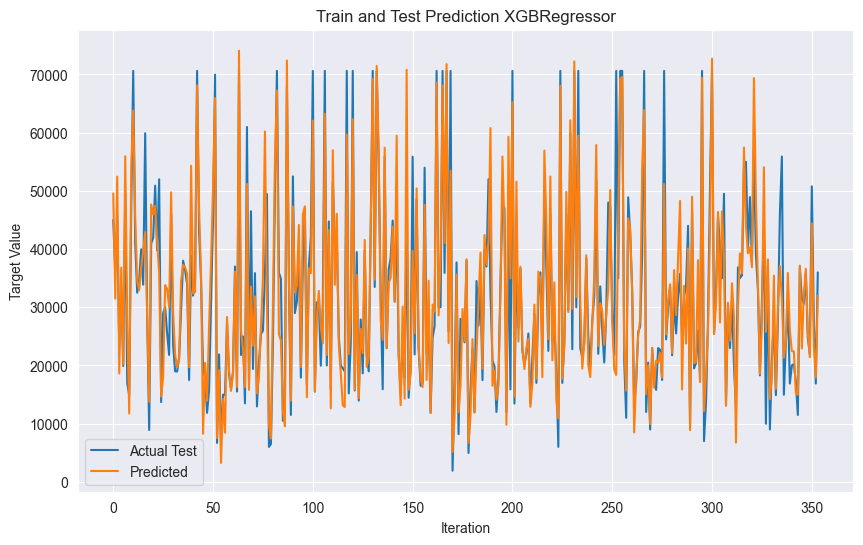

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor small.png')
plt.show()

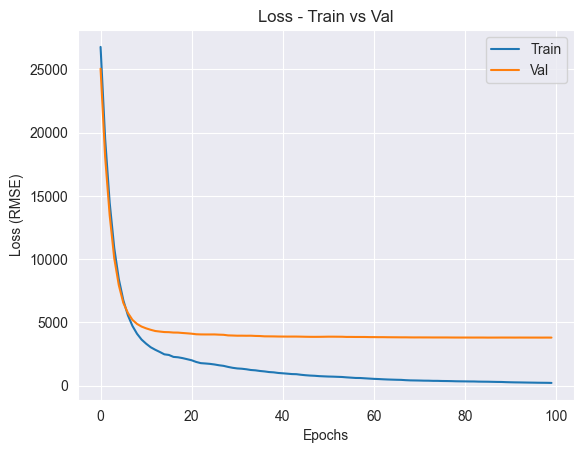

In [37]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=20)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot_small.png')
plt.show()

In [38]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 68.3369959050109
mean_squared_error: 84251754.71186441
mean_absolute_error: 6132.248587570622
root_mean_squared_error: 9178.875460091198

Cross validation score : 62.464064485644435

R2_Score - Cross Validation Score : 5.872931419366459


##### Đồ thị so khớp của mô hình

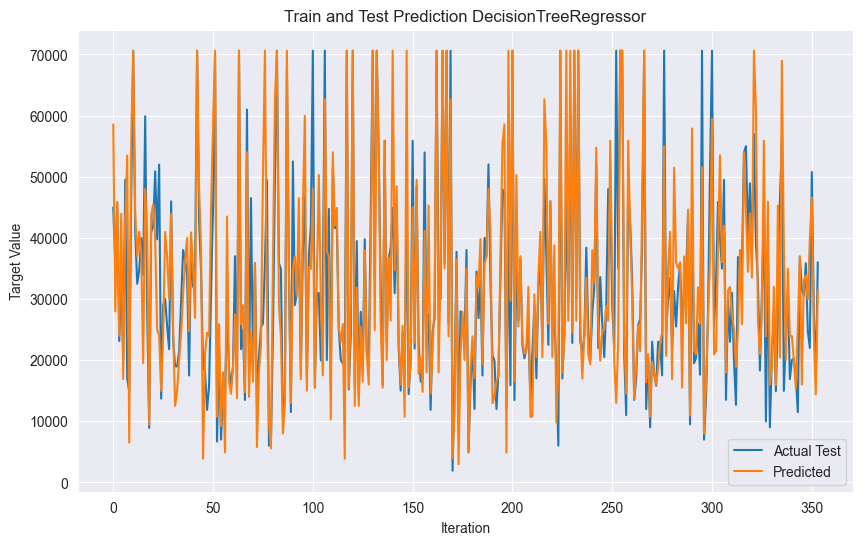

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor small.png')
plt.show()

### BaggingRegressor

In [40]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 78.8290484129371
mean_squared_error: 56333562.50022599
mean_absolute_error: 4994.273446327683
root_mean_squared_error: 7505.568765938127

Cross validation score : 82.11696109203655

R2_Score - Cross Validation Score : -3.287912679099449


##### Đồ thị so khớp của mô hình

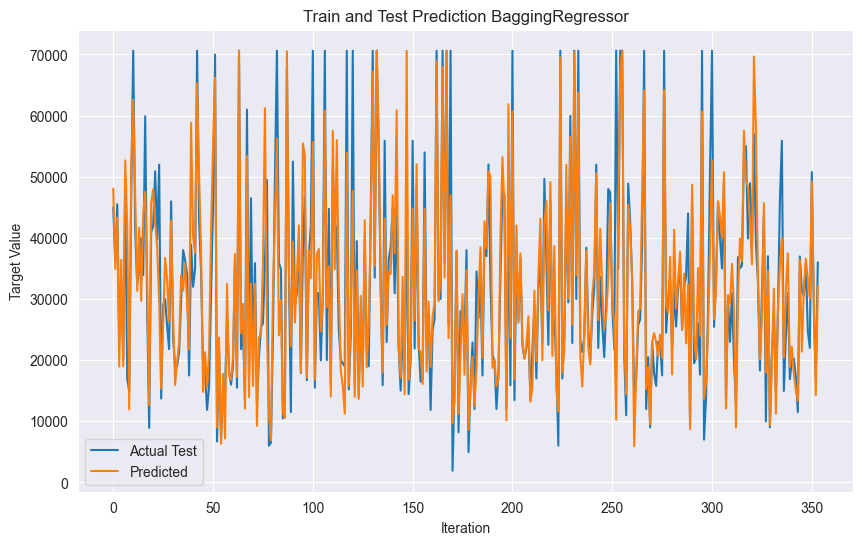

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction BaggingRegressor')
plt.legend()
plt.savefig('BaggingRegressor small.png')
plt.show()

[-] Đánh giá các mô hình hoạt động trên Dataset

[+] Từ hình ảnh so khớp nhận dạng và thực tế :

<img src="combined_image_small.png" alt="pred" width="1600">

- Ta có thể nhận thấy rằng ở tập dữ liệu Small thì giá được đoán có độ chính xác khá tốt. Nhìn kĩ thì ta sẽ thấy được giá được dự đoán lệch nhiều ở các mức giá cao hơn là các mức giá thấp, cụ thể giá cao thì dự đoán thấp hơn so với thực tế. 

### Quyết định mô hình

#### Từ bảng kết quả R2_Score và RMSE của 4 dataset khác nhau :


![R2_Score](r2_score_comparison_smallDS.png)

[-] Nhận xét: 

- Trong 4 dataset đưa ra, ta có thể thấy độ chính xác **R2_Score** trên tập dữ liệu **small_ftloc_with_outliers** là tốt nhất trong cả 4 dataset. 
- Nhìn vào hai dataset **with_outliers** và  **without_outliers**, ta thấy độ chính xác **R2_Score** của **ftloc_with_outliers** cao hơn so với  **ftloc_without_outliers**. Từ kết quả ta có thể thấy rằng khi thực hiện lọc đặc trưng, các ngoại lệ trong dataset small rất quan trọng và có ảnh hưởng tới giá của xe và không nên bị loại bỏ. Còn đối với dataset không lọc đặc trưng, việc xử lý ngoại lệ có cải thiện độ chính xác đối với các mô hình, ngoại trừ mô hình **XGBRegressor**.
- Nhìn vào hai dataset **ftloc** và  không có **ftloc** , độ chính xác **R2_Score** của **ftloc**  cao hơn không có **ftloc**. Từ kết quả ta có thể thấy rằng kết quả từ việc lọc đặc trưng có cải thiện độ chính xác trong dataset small. 

![RMSE](RMSE_comparison_smallDS.png)
![lossSmall](loss_plot_small.png)

- Từ các ảnh trên,ta có thể thấy rằng độ chính xác theo **R2_Score** và chấm điểm theo **RMSE** thì ở các mô hình có sự biến thiên rất không đồng đều. Và hai mô hình được đánh giá tốt nhất là **RandomForest** và **XGBRegressor**.
- Cả 2 mô hình tôi đề cập ở trên thay phiên nhau nắm giữ điểm R2_Score cao nhất và RMSE là thấp nhất
- Ở đồ thị Loss của mô hình XGBRegressor cũng đã thể hiện rằng mô hình được huấn luyện tốt,không có hiện tượng overfit hay underfit trên tập val
- Tập dũ liệu có độ chính xác cao nhất là **ftloc wiht outliers**.Vì vậy, tôi sẽ thực hiện việc cải thiện độ chính xác của 2 mô hình này bằng cách HyperParamater tunning trên từng mô hình để có thể tìm ra đâu là mô hình tốt nhất trên tập dữ liệu này

### Dùng **GridSearchCV** để thực hiện kiểm tra chéo và tìm ra siêu tham số tốt nhất
###### Ở đây tôi sẽ chọn GridSearchCV thay vì RandomizedSearchCV , mặc dù thời gian chạy có vẻ sẽ khá là lâu nhưng kết chúng ta nhận được sẽ là kết quả chính xác nhất và có cơ sở nhất

#### 1. Trên mô hình XGBRegressor

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

##### Ý nghĩa của các siêu tham số được lựa chọn
- n_estimators: số lượng cây ra quyết định, số lượng cây đủ lớn sẽ làm tăng độ chính xác cho mô hình,nhưng ngược lại sẽ tăng thời gian huấn luyện.
- max_depth: Độ sâu tối đa của cây quyết định .Một độ sâu thích hợp giúp tránh overfitting (mô hình quá phức tạp) và underfitting (mô hình quá đơn giản).
- learning_rate : learning_rate xác định tốc độ cập nhật các trọng số trong quá trình huấn luyện. Tỷ lệ học nhỏ giúp mô hình hội tụ chậm hơn nhưng có thể đạt được độ chính xác cao hơn. Tuy nhiên, nếu tỷ lệ học quá lớn, mô hình có thể không hội tụ hoặc bị overfitting.
- subsample : Tỷ lệ mẫu con được sử dụng để xây dựng cây .Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting
- colsample_bytree : Tỷ lệ đặc trưng được chọn ngẫu nhiên để xây dựng các cây con. Giá trị nhỏ hơn 1.0 giúp mô hình trở nên ổn định hơn và giảm khả năng overfitting.
- reg_alpha : tham số alpha trong regularization ,Tham số này điều chỉnh mức độ của regularization thông qua thành phần L1 regularization
- reg_lambda : tham số lambda trong regularization. Tham số này điều chỉnh mức độ của regularization thông qua thành phần L2 regularization


In [44]:
model = XGBRegressor()

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

In [46]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

##### Các siêu tham số tốt nhất sau khi Tunning

In [47]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 300,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5,
 'subsample': 0.8}

##### Huấn luyện lại mô hình tốt nhất với siêu tham số tốt nhất

In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
Final_mod_XGB=XGBRegressor( colsample_bytree=0.8, learning_rate=0.1,
                                max_depth=4,reg_alpha=0.5,n_estimators=300,reg_lambda=0.5,subsample=0.8 )
Final_mod_XGB.fit(X_train,Y_train)
pred=Final_mod_XGB.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

scores = cross_val_score(Final_mod_XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

R2_Score: 84.56286070655636
mean_squared_error: 41076521.64975488
mean_absolute_error: 4165.251369670286
RMSE value: 6409.096788920798

Cross validation score : 87.5042814641066


##### Lưu mô hình

In [62]:
import joblib
joblib.dump(Final_mod_XGB,"Car_Price_small_XGB.pkl")

['Car_Price_small_XGB.pkl']

In [63]:
# Loading the saved model
model=joblib.load("Car_Price_small_XGB.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([51111.816 , 34484.777 , 51459.64  , 22341.703 , 34837.13  ,
       17864.215 , 54087.445 , 20888.283 , 10217.01  , 52086.62  ,
       62974.05  , 42962.49  , 32252.646 , 36020.9   , 40221.777 ,
       27928.588 , 46439.98  , 30791.082 ,  9861.516 , 46832.195 ,
       46964.4   , 43286.55  , 40500.754 , 34535.754 , 15667.593 ,
       14822.709 , 35403.48  , 30856.016 , 29302.324 , 45772.332 ,
       26139.41  , 18281.861 , 17678.459 , 20987.041 , 34777.414 ,
       36538.477 , 38513.645 , 29999.404 , 20669.785 , 55022.17  ,
       38681.766 , 33413.016 , 66301.45  , 52185.062 , 31919.535 ,
       15055.319 , 19543.598 , 11697.572 , 22595.162 , 36070.848 ,
       49626.57  , 65303.688 ,  6155.1924, 24579.502 ,  4022.5034,
       18103.629 , 11911.65  , 31044.984 , 19511.314 , 15084.173 ,
       20352.877 , 38346.633 , 14915.472 , 75456.68  , 24221.621 ,
       24302.441 , 15131.662 , 56444.37  , 17768.414 , 39586.79  ,
       20512.475 , 31897.125 , 10623.347 , 25299.34  , 25365.6

##### Xem các giá trị dự đoán và thực tế

In [51]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
Predicted,46960.800781,31755.736328,49622.925781,19231.664062,35831.132812,18363.28125,49400.847656,28594.566406,11112.280273,52681.84375,...,36844.363281,21913.205078,28153.134766,36204.589844,24973.474609,25182.298828,50674.167969,29514.480469,17828.164062,29747.746094
Actual,44990.000000,35990.000000,45500.000000,23107.000000,33490.000000,19900.00000,49499.000000,16950.000000,14899.000000,46970.00000,...,36950.000000,31480.000000,30549.000000,35850.000000,24745.000000,21985.000000,50770.000000,27999.000000,16880.000000,35990.000000


##### Trực quan hóa bằng đồ thị

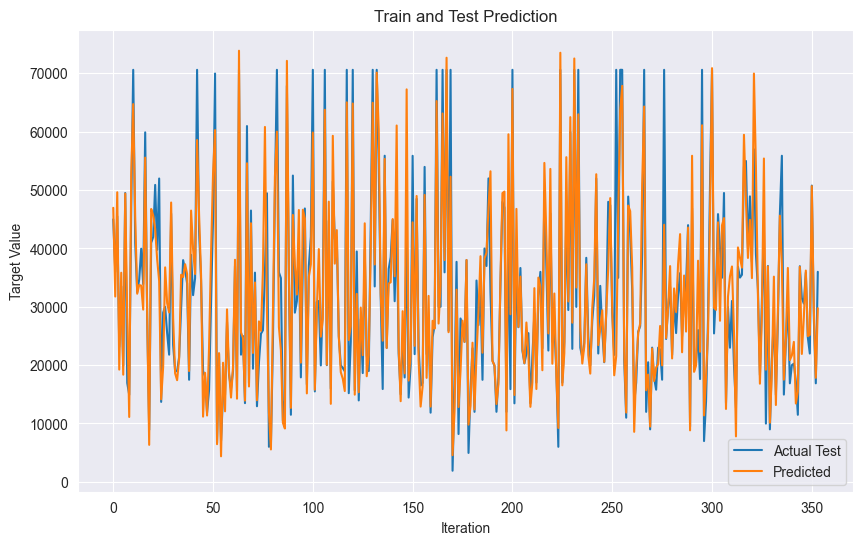

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), prediction, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction')
plt.legend()
plt.show()

#### 2. Trên mô hình RandomForestRegressor

##### Ý nghĩa của các siêu tham số được lựa chọn
###### Ở đây tôi sẽ không đề cập đến các siêu tham số giống ở mô hình XGBRegressor, tôi chỉ đề cập đến các siêu tham số khác biệt giữa 2 mô hình
- min_samples_split :Đây là số lượng mẫu tối thiểu cần có trong mỗi nút để tiếp tục phân chia. Nếu số lượng mẫu trong một nút nhỏ hơn giá trị này, thì việc phân chia sẽ dừng lại. Giá trị nhỏ hơn có thể dẫn đến overfitting, trong khi giá trị lớn hơn có thể dẫn đến underfitting.
- min_samples_leaf: Đây là số lượng mẫu tối thiểu được yêu cầu trong mỗi lá của cây. Nếu số lượng mẫu trong một lá nhỏ hơn giá trị này, thì cây sẽ không phân chia thêm và dừng lại. Giá trị nhỏ hơn có thể dẫn đến overfitting, trong khi giá trị lớn hơn có thể dẫn đến underfitting.
- max_features: Đây là số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất trong cây quyết định.



In [53]:
parameters = {
    'n_estimators': [100, 200, 300],           # Số lượng cây
    'max_depth': [None, 5, 10],                 # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],            # Số lượng mẫu tối thiểu để phân chia một nút trong cây
    'min_samples_leaf': [1, 2, 4],              # Số lượng mẫu tối thiểu trong mỗi lá của cây
    'max_features': ['auto', 'sqrt', 'log2'],   # Số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất
}

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

# Tinh chỉnh siêu tham số với RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters,
                                   scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [56]:
Final_mod_forest=RandomForestRegressor(max_depth=None, max_features='sqrt',
                                min_samples_split=2,min_samples_leaf=1,n_estimators=300)
Final_mod_forest.fit(X_train,Y_train)
pred=Final_mod_forest.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 82.02813955801889
mean_squared_error: 47821134.505467795
mean_absolute_error: 4756.897664783428
RMSE value: 6915.282677191713


In [57]:
import joblib
joblib.dump(Final_mod_forest,"Car_Price_small_RanFor.pkl")

['Car_Price_small_RanFor.pkl']

In [58]:
# Loading the saved model
model=joblib.load("Car_Price_small_RanFor.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([46959.90333333, 31621.87666667, 47933.47666667, 22215.32      ,
       41253.44333333, 21452.68333333, 52375.03666667, 31713.61      ,
       13639.26333333, 46341.80333333, 57828.72      , 39080.76      ,
       34466.33333333, 36981.62333333, 31212.11      , 37515.74      ,
       48179.12      , 32002.78      , 14782.52      , 43964.76      ,
       43395.06666667, 43422.61      , 39549.15666667, 32350.93333333,
       16709.14      , 22922.13      , 36513.59      , 32026.94      ,
       30950.10333333, 41274.85333333, 26911.10666667, 19641.16666667,
       20523.33666667, 23902.89333333, 33497.53333333, 32147.18      ,
       37010.36333333, 32579.40333333, 21673.39333333, 46853.79666667,
       37594.74333333, 35274.69666667, 59125.19666667, 52228.49333333,
       40757.74333333, 21396.06      , 19875.76      , 17241.69666667,
       23064.72333333, 40092.39      , 48036.92666667, 55575.59333333,
       11669.18666667, 24345.63      ,  8487.82333333, 19898.14666667,
      

In [59]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])


,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
Predicted,46959.903333,31621.876667,47933.476667,22215.32,41253.443333,21452.683333,52375.036667,31713.61,13639.263333,46341.803333,...,35848.366667,24404.883333,31687.563333,36039.27,29406.073333,21640.703333,46252.936667,31175.516667,21283.473333,31790.106667
Actual,44990.000000,35990.000000,45500.000000,23107.00,33490.000000,19900.000000,49499.000000,16950.00,14899.000000,46970.000000,...,36950.000000,31480.000000,30549.000000,35850.00,24745.000000,21985.000000,50770.000000,27999.000000,16880.000000,35990.000000


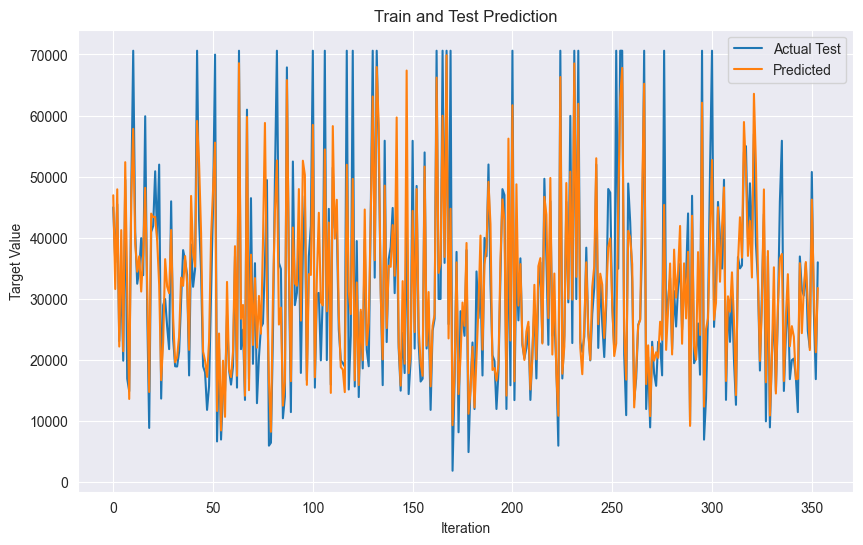

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), prediction, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction')
plt.legend()
plt.show()

# TỔNG KẾT

- Trong tập dữ liệu SmallDS, mô hình XGBRegressor cho độ chính xác R2_Score đạt 85.36% trước khi lựa chọn siêu tham số . Đồng thời mô hình cũng được đánh giá cao nhờ được chấm theo điểm của RMSE là thấp nhất.
- Sau khi lựa chọn siêu tham số, ta có thể nâng độ chính xác của mô hình lên 87.61% cụ thể cải thiện hơn 2.2%, chính xác ban đầu đã là khá tốt và tập dữ liệu chỉ có 1000 mẫu nên việc cải thiện độ chính xác lên 2% là một kết quả tích cực.Còn ở mô hình RandomForestRegressor thì được cải thiện khoảng hơn 1% ( từ 84.46% lên 85.48%), vẫn không vượt qua được XGBRegressor
- Việc lựa chọn nhiều mô hình để kiểm thử và đánh giá cho ta 1 cái nhìn khách quan và toàn diện hơn để tìm ra mô hình tốt nhất cho dữ liệu. Đây cũng là 1 trong những việc rất cần thiết để nâng sự thành công trong việc dự đoán